<a href="https://colab.research.google.com/github/LKSfiuza/Machine-Learning-projects/blob/main/Primeira_Submiss%C3%A3o_Kaggle_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Titanic - Machine Learning from Disaster

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [4]:
# Abrir o dataset de treino e teste

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [6]:
# Pré-processamento dos dados

# Descrição estatistica das fetures numericas

train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
# Verificando valores nulos ou NaN

print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [10]:
# Criando os dados de treinamento e teste

# Retirada das colunas ID e Survived

X_train = train.drop(['PassengerId', 'Survived'], axis = 1)

X_test = test.drop(['PassengerId'], axis = 1)

In [11]:
# Modificando as coluna Sex para valores de 1 para Female e 0 para Male

subs = {'male': 0, 'female': 1}
X_train['mulher'] = X_train['Sex'].replace(subs)
X_test['mulher'] = X_test['Sex'].replace(subs)

In [12]:
# Selecionando a feature

X_train = X_train[['mulher']]
X_test = X_test[['mulher']]

y_train = train['Survived']

In [14]:
# Modelo e validação cruzada

model_lr = LogisticRegression()

score = cross_val_score(model_lr, X_train, y_train, cv = 10)

print(score.mean())

0.786729088639201


In [19]:
# Modelo final

model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_train)

In [21]:
mc = confusion_matrix(y_train, y_pred)
print(mc)

[[468  81]
 [109 233]]


In [22]:
score = model_lr.score(X_train, y_train)
print(score)

0.7867564534231201


In [23]:
# Predição nos dados de test

y_pred = model_lr.predict(X_test)

In [24]:
submissao = pd.DataFrame(test['PassengerId'])
submissao['Survived'] = y_pred

In [25]:
submissao.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


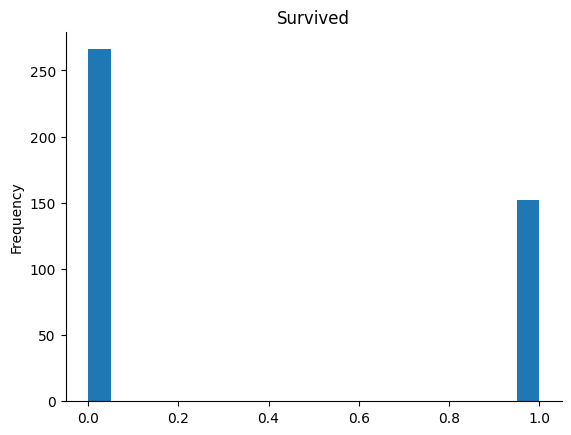

In [27]:
# @title Survived

from matplotlib import pyplot as plt
submissao['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [26]:
submissao.to_csv('submissao1.csv', index = False)